## LDA & QDA
### The Stock Market data
We will use the "The Stock Market dataset” from the book “An Introduction to Statistical Learning, with applications in R”, G. James, D. Witten,  T. Hastie and R. Tibshirani, Springer, 2013. There is a package in R called ISLR with this dataset included.

Daily percentage returns for the S&P 500 stock index between 2001 and 2005 (source: raw values of the S&P 500 were obtained from Yahoo Finance and then converted to percentages and lagged).

The stock market data includes 1250 examples of stock market information, each with 9 features: Year, Lag1, Lag2, Lag3, Lag4, Lag5, Volume, Today and Direction. Direction is the class feature with two possible outcomes: up or down.

In [1]:
library(MASS)
library(ISLR)

# First check LDA assumtions!

# The observations are a random sample: we will assume there are...
# Each predictor variable is normally distributed
shapiro.test(Smarket$Lag1)
shapiro.test(Smarket$Lag1)

Warning message:
“package ‘MASS’ was built under R version 3.3.2”Warning message:
“package ‘ISLR’ was built under R version 3.3.2”


	Shapiro-Wilk normality test

data:  Smarket$Lag1
W = 0.97219, p-value = 8.889e-15



	Shapiro-Wilk normality test

data:  Smarket$Lag1
W = 0.97219, p-value = 8.889e-15


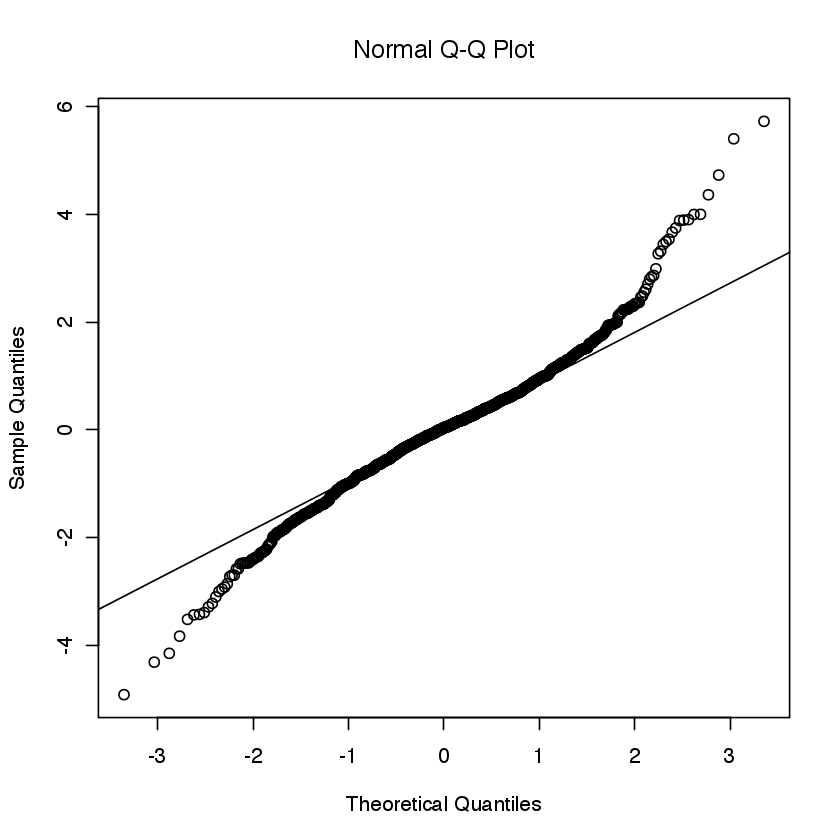

In [2]:
qqnorm(y = Smarket$Lag1)
qqline(y = Smarket$Lag1)

[1] 1.291175

[1] 1.291133

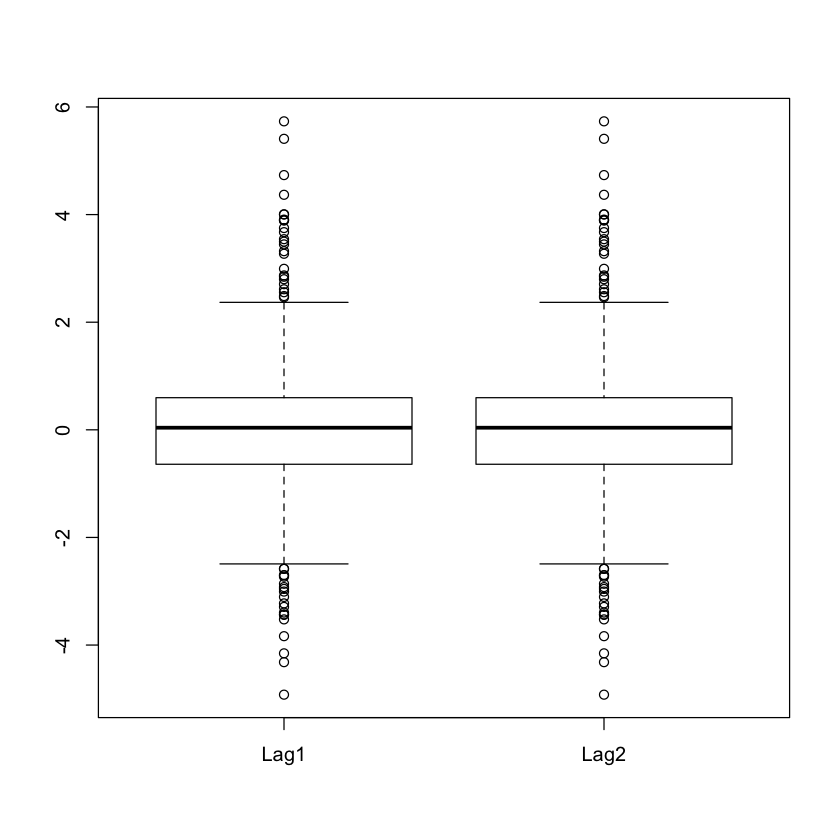

In [7]:
# Predictors have a common variance
boxplot(Smarket[,2:3])

var(Smarket$Lag1)
var(Smarket$Lag2)

In [116]:
# Linear Discriminant Analysis
lda.fit <- lda(Direction~Lag1+Lag2,data=Smarket, subset=Year<2005)
lda.fit

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = Year < 
    2005)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

## $D=v_1X_1+v_2X_2+\ldots+v_iX_i+a$

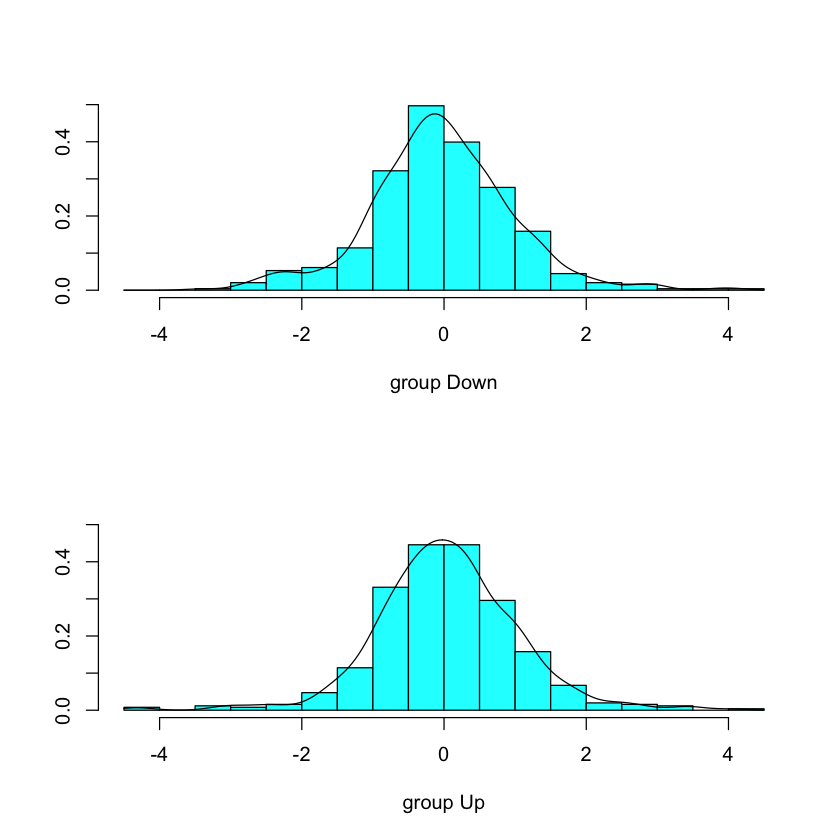

In [115]:
plot(lda.fit, type="both", xlab = "LD1", ylab = "Normalizedc frequency") # xlab and ylab are overwritten

In [12]:
Smarket.2005 <- subset(Smarket,Year==2005)
lda.pred <- predict(lda.fit,Smarket.2005)
class(lda.pred)
lda.pred

[1] "list"

,Down,Up
999,0.4901792,0.5098208
1000,0.4792185,0.5207815
1001,0.4668185,0.5331815
1002,0.4740011,0.5259989
1003,0.4927877,0.5072123
1004,0.4938562,0.5061438
1005,0.4951016,0.5048984
1006,0.4872861,0.5127139
1007,0.4907013,0.5092987
1008,0.4844026,0.5155974


In [13]:
data.frame(lda.pred)

,class,posterior.Down,posterior.Up,LD1
999,Up,0.4901792,0.5098208,0.08293096
1000,Up,0.4792185,0.5207815,0.59114102
1001,Up,0.4668185,0.5331815,1.16723063
1002,Up,0.4740011,0.5259989,0.83335022
1003,Up,0.4927877,0.5072123,-0.03792892
1004,Up,0.4938562,0.5061438,-0.08743142
1005,Up,0.4951016,0.5048984,-0.14512719
1006,Up,0.4872861,0.5127139,0.21701324
1007,Up,0.4907013,0.5092987,0.05873792
1008,Up,0.4844026,0.5155974,0.35068642


In [14]:
table(lda.pred$class,Smarket.2005$Direction)
mean(lda.pred$class==Smarket.2005$Direction)

      
       Down  Up
  Down   35  35
  Up     76 106

[1] 0.5595238

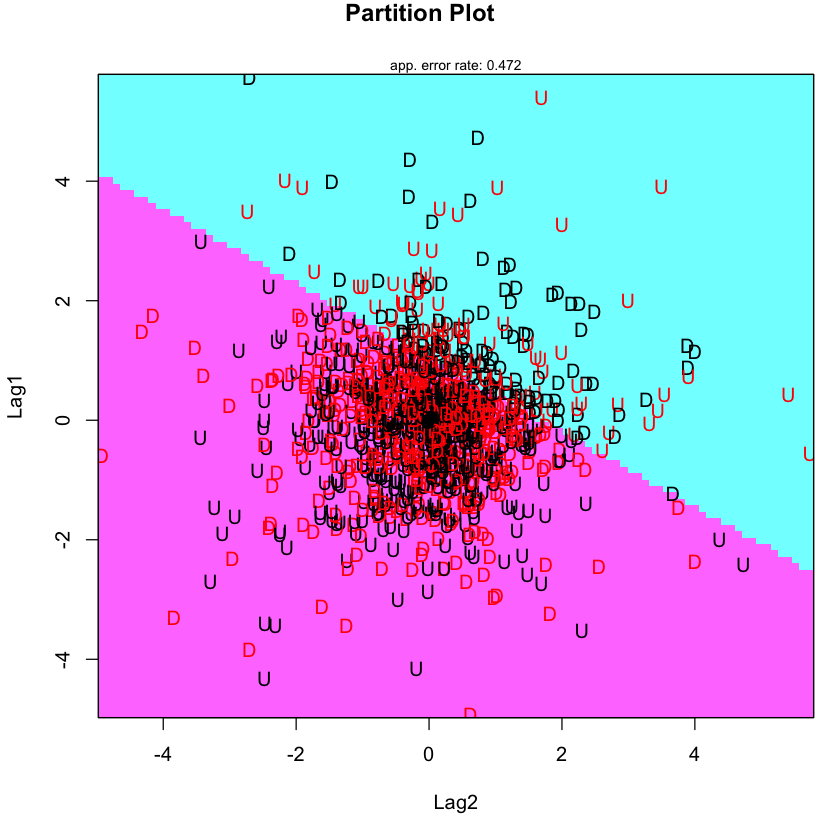

In [15]:
library(klaR)
partimat(Direction~Lag1+Lag2, data=Smarket, method="lda")

### QDA

In [16]:
# Check same variance but this time for each class
var(Smarket[Smarket$Direction == "Up",]$Lag1)
var(Smarket[Smarket$Direction == "Up",]$Lag2)
var(Smarket[Smarket$Direction == "Down",]$Lag1)
var(Smarket[Smarket$Direction == "Down",]$Lag2)

[1] 1.279137

[1] 1.247171

[1] 1.302041

[1] 1.339052

In [17]:
# QDA
qda.fit <- qda(Direction~Lag1+Lag2, data=Smarket, subset=Year<2005)
qda.fit

Call:
qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = Year < 
    2005)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

In [18]:
qda.pred <- predict(qda.fit,Smarket.2005)
class(qda.pred)
data.frame(qda.pred)

[1] "list"

,class,posterior.Down,posterior.Up
999,Up,0.4873243,0.5126757
1000,Up,0.4759011,0.5240989
1001,Up,0.4636911,0.5363089
1002,Up,0.4739253,0.5260747
1003,Up,0.4903426,0.5096574
1004,Up,0.4913561,0.5086439
1005,Up,0.4922951,0.5077049
1006,Up,0.4847447,0.5152553
1007,Up,0.4889595,0.5110405
1008,Up,0.4818971,0.5181029


In [19]:
table(qda.pred$class,Smarket.2005$Direction)
mean(qda.pred$class==Smarket.2005$Direction)

      
       Down  Up
  Down   30  20
  Up     81 121

[1] 0.5992063

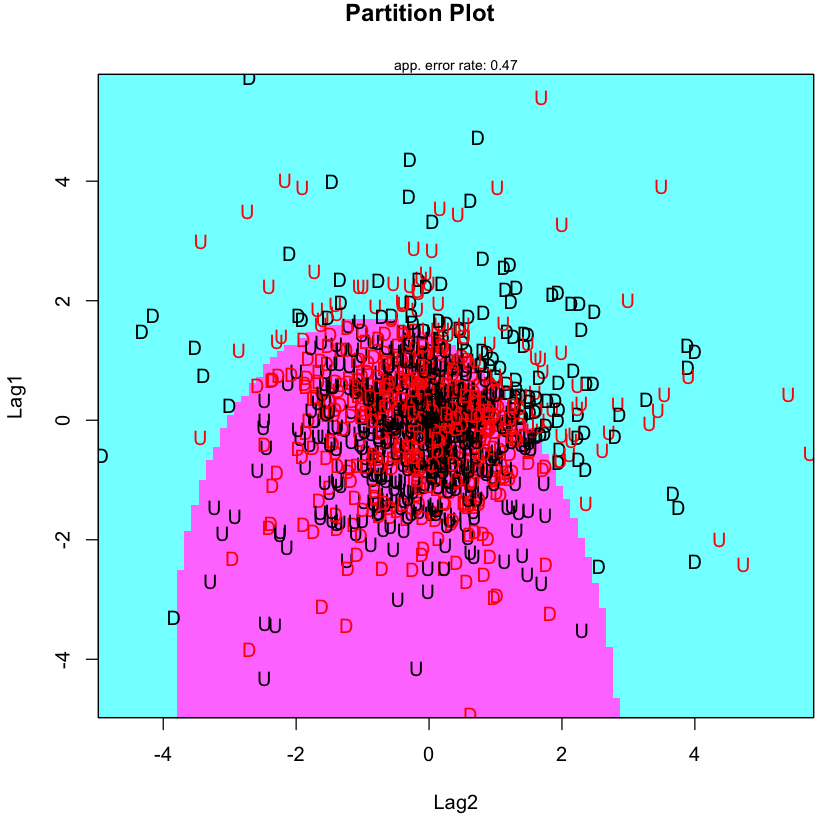

In [20]:
partimat(Direction~Lag1+Lag2, data=Smarket ,method="qda")

## Iris Data
When there are more than two groups we can estimate more than one discriminant function:
## $D_1=v_1X_1+v_2X_2+\ldots+v_iX_i+a$
## $D_2=w_1X_1+w_2X_2+\ldots+w_iX_i+b$
For example, when there are three groups, we could estimate (1) a function for discriminating between group 1 and groups 2 and 3 combined, and (2) another function for discriminating between group 2 and group 3.
### LDA

In [21]:
data(iris)
iris.lda <- lda(Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width,  data = iris)
iris.lda

Call:
lda(Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, 
    data = iris)

Prior probabilities of groups:
    setosa versicolor  virginica 
 0.3333333  0.3333333  0.3333333 

Group means:
           Sepal.Length Sepal.Width Petal.Length Petal.Width
setosa            5.006       3.428        1.462       0.246
versicolor        5.936       2.770        4.260       1.326
virginica         6.588       2.974        5.552       2.026

Coefficients of linear discriminants:
                    LD1         LD2
Sepal.Length  0.8293776  0.02410215
Sepal.Width   1.5344731  2.16452123
Petal.Length -2.2012117 -0.93192121
Petal.Width  -2.8104603  2.83918785

Proportion of trace:
   LD1    LD2 
0.9912 0.0088 

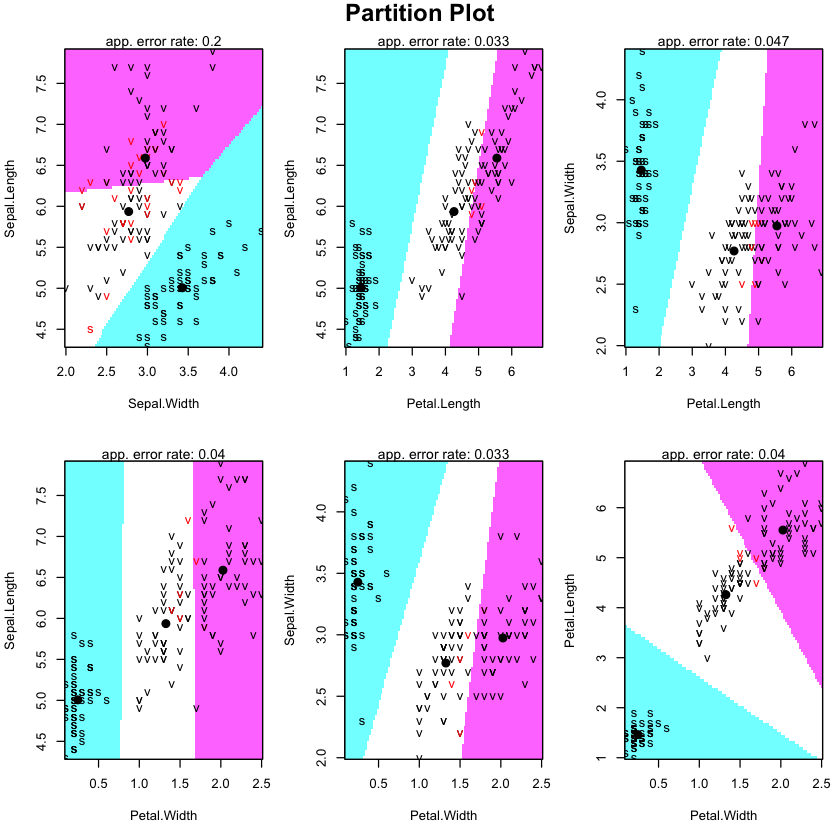

In [22]:
partimat(Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width, data=iris, method="lda")

### Using caret...

In [23]:
TrainData <- iris[,1:4]
TrainClasses <- iris[,5]
library(caret)
ldaFit <- train(TrainData, TrainClasses,
                method = "lda",
                preProcess = c("center", "scale"),
                tuneLength = 10,
                trControl = trainControl(method = "cv"))
ldaFit
confusionMatrix(ldaFit)

Warning message:
“package ‘caret’ was built under R version 3.3.2”Loading required package: lattice
Warning message:
“package ‘lattice’ was built under R version 3.3.2”Loading required package: ggplot2
Warning message in as.POSIXlt.POSIXct(Sys.time()):
“unknown timezone 'zone/tz/2017c.1.0/zoneinfo/Europe/Madrid'”

Linear Discriminant Analysis 

150 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

Pre-processing: centered (4), scaled (4) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 135, 135, 135, 135, 135, 135, ... 
Resampling results:

  Accuracy  Kappa
  0.98      0.97 


Cross-Validated (10 fold) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
            Reference
Prediction   setosa versicolor virginica
  setosa       33.3        0.0       0.0
  versicolor    0.0       32.0       0.7
  virginica     0.0        1.3      32.7
                          
 Accuracy (average) : 0.98


In [24]:
qdaFit <- train(TrainData, TrainClasses,
                method = "qda",
                preProcess = c("center", "scale"),
                tuneLength = 10,
                trControl = trainControl(method = "cv"))
qdaFit
confusionMatrix(qdaFit)

Quadratic Discriminant Analysis 

150 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

Pre-processing: centered (4), scaled (4) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 135, 135, 135, 135, 135, 135, ... 
Resampling results:

  Accuracy   Kappa
  0.9733333  0.96 


Cross-Validated (10 fold) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
            Reference
Prediction   setosa versicolor virginica
  setosa       33.3        0.0       0.0
  versicolor    0.0       31.3       0.7
  virginica     0.0        2.0      32.7
                            
 Accuracy (average) : 0.9733


## Exercise 1
* Try lda with all Lag variables.
* Make a quick comparison between logistic regression and lda.
* Try with qda and compare all three methods. Plot the results.

## Exercise 2
Using only the information in file clasif_train_alumnos.csv:
* Compare lda and qda using Wilcoxon.
* Perform a multiple comparison using Friedman.
* Using Holm see if there is a winning algorithm (even if Friedman says there is no chance…).